# Playing around with the dummy Gaia archive

gully

Sept 2, 2016

## Attempt 1: 100000 sources in Taurus, $1^{\circ}$ radius

```SQL
SELECT TOP 100000 * FROM public.gaia_source  WHERE CONTAINS(POINT('ICRS',public.gaia_source.ra,public.gaia_source.dec),CIRCLE('ICRS',64.1171208,28.1266139,1.0))=1  
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from astropy.io import votable

In [4]:
out = votable.parse_single_table('../data/result.vot_01.gz')

In [5]:
out2 = out.to_table()

In [6]:
out3 = out2.to_pandas()

In [7]:
out2[0:5]

astrometric_chi2_ac,astrometric_chi2_al,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_go_f,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_n_outliers_ac,astrometric_n_outliers_al,astrometric_params_solved,astrometric_primary_flag,astrometric_priors_used,astrometric_rank_defect,astrometric_relegation_factor,astrometric_weight_ac,astrometric_weight_al,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,matched_observations,parallax,parallax_error,parallax_pmdec_corr,parallax_pmra_corr,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_g_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,ra,ra_dec_corr,ra_error,random_index,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,ref_epoch,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,source_id
,,,Angle[mas],,,,,,,,,,,,Angle[mas^-2],Angle[mas^-2],Angle[deg],Angle[mas],Dimensionless[see description],Dimensionless[see description],Dimensionless[see description],,Angle[mas],Angle[mas],Dimensionless[see description],Dimensionless[see description],Flux[e-/s],Flux[e-/s],Magnitude[mag],,Dimensionless[see description],Angular Velocity[mas/year],Angular Velocity[mas/year],Angular Velocity[mas/year],Angular Velocity[mas/year],Dimensionless[see description],Angle[deg],Dimensionless[see description],Angle[mas],,Dimensionless[see description],Dimensionless[see description],Dimensionless[see description],Time[Julian Years],Angle[deg],Angle[deg],Angle[deg],Angle[deg],,,,,
float32,float32,float32,float64,float64,float32,int32,int32,int32,int32,int16,bool,int32,int32,float32,float32,float32,float64,float64,float32,float32,float32,int16,float64,float64,float32,float32,float64,float64,float64,int32,object,float64,float64,float64,float64,float32,float64,float32,float64,int64,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,int64
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.250113648274571,2.9999999355286926,--,--,--,0,--,--,--,--,2669.7276411877683,197.84678819342389,17.053432604980468,0,--,--,--,--,--,--,64.66043817587564,--,2.9999999355286926,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870415718325888
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.26158077840164,8.0000003166097127,--,--,--,0,--,--,--,--,548.27666749210982,42.337209033444559,18.772100588989257,0,--,--,--,--,--,--,64.669052686381264,--,9.0000001729859775,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870518797541248
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.262784166666652,15.000000044043363,--,--,--,0,--,--,--,--,243.67110046433208,19.38425599744679,19.652589938354492,0,--,--,--,--,--,--,64.67942749999996,--,21.999999771477011,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870518800285440
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.270930540093381,5.0000000146811203,--,--,--,0,--,--,--,--,1946.9282805744538,149.53503963828697,17.396225115966796,0,--,--,--,--,--,--,64.681303252625014,--,5.0000000146811203,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870553157279744
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.273506388888876,324.99999362627483,--,--,--,0,--,--,--,--,509.30110439028897,187.63346372627387,18.852163455200195,0,--,--,--,--,--,--,64.685003611111071,--,229.99999188173396,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870553158746240


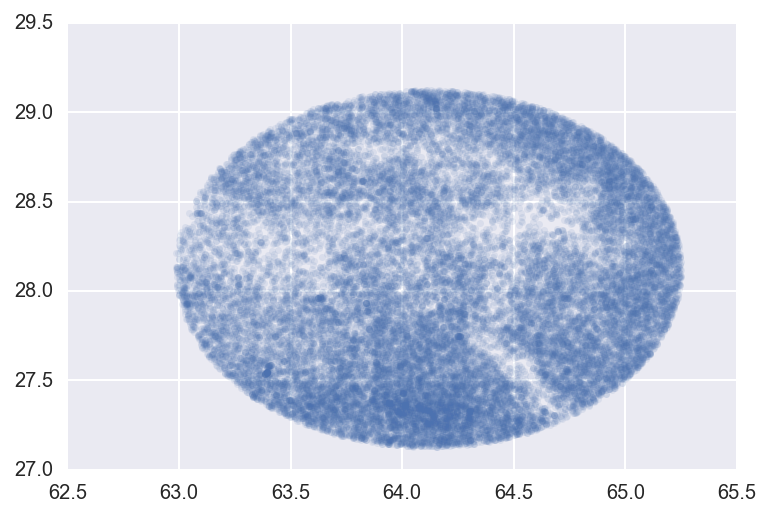

In [10]:
plt.plot(out3.ra, out3.dec, '.', alpha=0.1)

In [29]:
gaia = out3

In [30]:
gpos = SkyCoord(gaia.ra*u.deg, gaia.dec*u.deg, frame='icrs')

## Let's make some postage stamps

In [11]:
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
sns.set_style('ticks')

In [13]:
fn = '../data/LkCa4_DSS.fits'
hdu_list = fits.open(fn)
hdu_list.info()

Filename: ../data/LkCa4_DSS.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     168   (300, 300)   float32   


In [14]:
image_data = hdu_list[0].data

hdu_list.close()
wcs = WCS('../data/LkCa4_DSS.fits')

In [15]:
position = SkyCoord('04h16m28.109s +28d07m35.81s', frame='icrs')

In [25]:
cutout = Cutout2D(image_data, position, 50.0*u.arcsecond, wcs=wcs)
cutout2 = Cutout2D(image_data, position, 150.0*u.arcsecond, wcs=wcs)

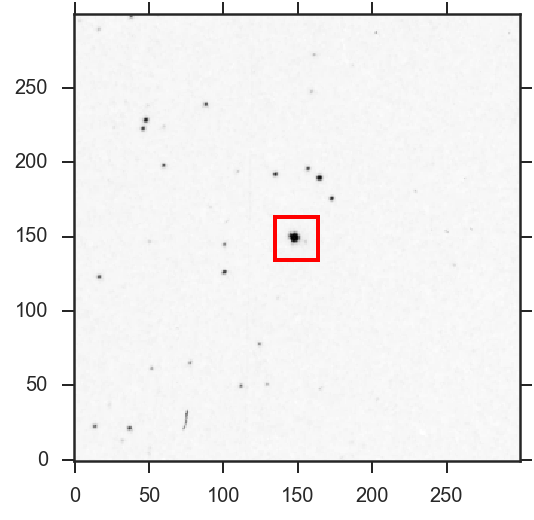

In [26]:
plt.imshow(image_data, origin='lower', interpolation='none')
cutout.plot_on_original(color='red', lw=2)

In [27]:
from matplotlib.patches import Rectangle

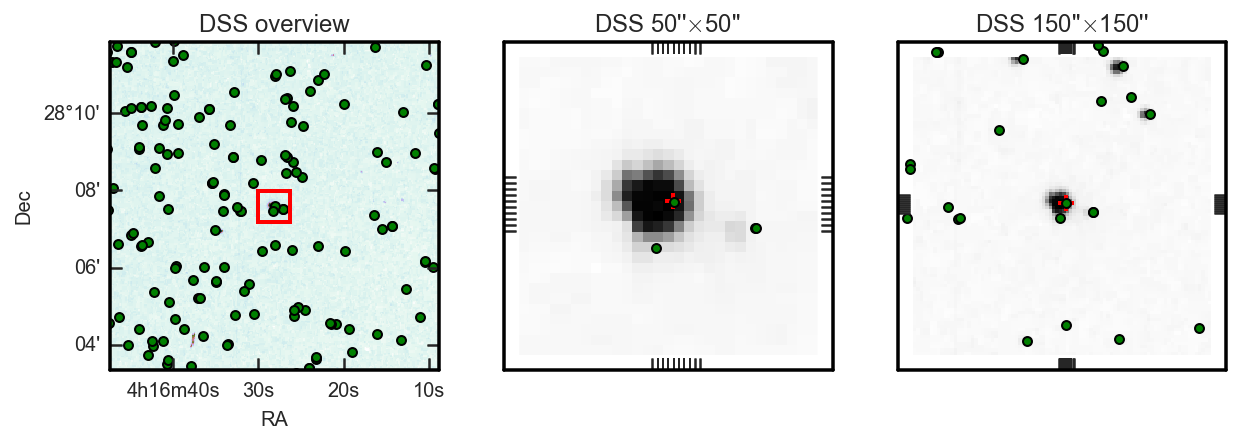

In [52]:
ra_vec = np.arange(-5, 5)*u.arcsecond
d_ra = ra_vec.to(u.degree).value
mult_ra = position.ra.value + d_ra

dec_vec = np.arange(-5, 5)*u.arcsecond
d_dec = dec_vec.to(u.degree).value
mult_dec = position.dec.value + d_dec

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(131, projection=wcs)
plt.imshow(image_data.data, origin='lower', cmap='cubehelix_r', interpolation='none')
plt.xlabel('RA')
plt.ylabel('Dec')

cutout.plot_on_original(color='red', lw=2)

lon1 = ax1.coords[0]
lon1.set_major_formatter('hh:mm:ss')
#lon1.set_separator((':', ":"))

ax1.set_title('DSS overview')

xlims, ylims = ax1.get_xlim(), ax1.get_ylim()
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)

ax1.scatter([gpos.ra.value], [gpos.dec.value], transform=ax1.get_transform('icrs'), s=20, c='g', marker='o', lw=1)

ax2 = fig.add_subplot(132, projection=cutout.wcs)
plt.imshow(cutout.data, origin='lower', cmap='Greys', interpolation='none')

lon = ax2.coords[0]
lat = ax2.coords[1]

lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_ticks(mult_ra * u.degree)
lat.set_ticks(mult_dec * u.degree)
ax2.scatter([position.ra.value], [position.dec.value], transform=ax2.get_transform('icrs'), s=60, c='r', marker='+', lw=2)

ra1 = position.ra.value + (12.0*u.arcsecond).to(u.degree).value
dec1 = position.dec.value + (10.0*u.arcsecond).to(u.degree).value
rect_post = (ra1, dec1)
ras, decs = (7.8*u.arcsecond).to(u.degree).value, (7.8*u.arcsecond).to(u.degree).value

r = Rectangle(rect_post, ras, decs, edgecolor='blue', facecolor='none', lw=2,
              transform=ax2.get_transform('icrs'))
#ax2.add_patch(r)
ax2.set_title(r"DSS 50''$\times$50'' ")

xlims, ylims = ax2.get_xlim(), ax2.get_ylim()
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)

ax2.scatter([gpos.ra.value], [gpos.dec.value], transform=ax2.get_transform('icrs'), s=20, c='g', marker='o', lw=1)



ax3 = fig.add_subplot(133, projection=cutout2.wcs)
plt.imshow(cutout2.data, origin='lower', cmap='Greys', interpolation='none')


lon3 = ax3.coords[0]
lat3 = ax3.coords[1]

lon3.set_ticklabel_visible(False)
lat3.set_ticklabel_visible(False)
lon3.set_ticks(mult_ra * u.degree)
lat3.set_ticks(mult_dec * u.degree)
ax3.scatter([position.ra.value], [position.dec.value], transform=ax3.get_transform('icrs'), s=60, c='r', marker='+', lw=2)



xlims, ylims = ax3.get_xlim(), ax3.get_ylim()
ax3.set_xlim(xlims)
ax3.set_ylim(ylims)

ax3.scatter([gpos.ra.value], [gpos.dec.value], transform=ax3.get_transform('icrs'), s=20, c='g', marker='o', lw=1)


ax3.set_title(r"DSS 150''$\times$150'' ")
plt.savefig('../results/LkCa4_DSS_gaia.png', dpi=300)

In [51]:
!mkdir ../results

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:80: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


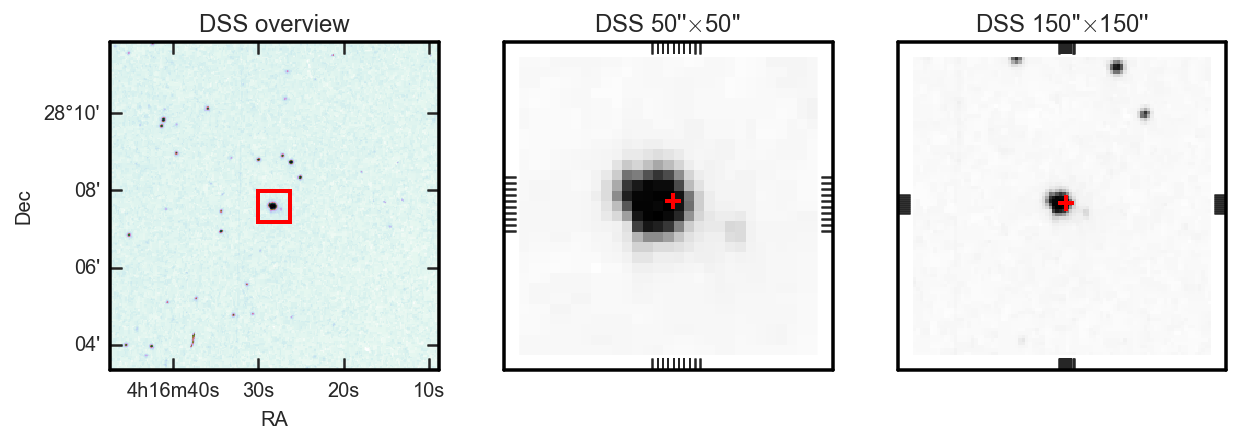

In [53]:
ra_vec = np.arange(-5, 5)*u.arcsecond
d_ra = ra_vec.to(u.degree).value
mult_ra = position.ra.value + d_ra

dec_vec = np.arange(-5, 5)*u.arcsecond
d_dec = dec_vec.to(u.degree).value
mult_dec = position.dec.value + d_dec

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(131, projection=wcs)
plt.imshow(image_data.data, origin='lower', cmap='cubehelix_r', interpolation='none')
plt.xlabel('RA')
plt.ylabel('Dec')

cutout.plot_on_original(color='red', lw=2)

lon1 = ax1.coords[0]
lon1.set_major_formatter('hh:mm:ss')
#lon1.set_separator((':', ":"))

ax1.set_title('DSS overview')

xlims, ylims = ax1.get_xlim(), ax1.get_ylim()
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)

#ax1.scatter([gpos.ra.value], [gpos.dec.value], transform=ax1.get_transform('icrs'), s=20, c='g', marker='o', lw=1)



ax2 = fig.add_subplot(132, projection=cutout.wcs)
plt.imshow(cutout.data, origin='lower', cmap='Greys', interpolation='none')

lon = ax2.coords[0]
lat = ax2.coords[1]

lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
lon.set_ticks(mult_ra * u.degree)
lat.set_ticks(mult_dec * u.degree)
ax2.scatter([position.ra.value], [position.dec.value], transform=ax2.get_transform('icrs'), s=60, c='r', marker='+', lw=2)

ra1 = position.ra.value + (12.0*u.arcsecond).to(u.degree).value
dec1 = position.dec.value + (10.0*u.arcsecond).to(u.degree).value
rect_post = (ra1, dec1)
ras, decs = (7.8*u.arcsecond).to(u.degree).value, (7.8*u.arcsecond).to(u.degree).value

r = Rectangle(rect_post, ras, decs, edgecolor='blue', facecolor='none', lw=2,
              transform=ax2.get_transform('icrs'))
#ax2.add_patch(r)
ax2.set_title(r"DSS 50''$\times$50'' ")

xlims, ylims = ax2.get_xlim(), ax2.get_ylim()
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)

#ax2.scatter([gpos.ra.value], [gpos.dec.value], transform=ax2.get_transform('icrs'), s=20, c='g', marker='o', lw=1)



ax3 = fig.add_subplot(133, projection=cutout2.wcs)
plt.imshow(cutout2.data, origin='lower', cmap='Greys', interpolation='none')


lon3 = ax3.coords[0]
lat3 = ax3.coords[1]

lon3.set_ticklabel_visible(False)
lat3.set_ticklabel_visible(False)
lon3.set_ticks(mult_ra * u.degree)
lat3.set_ticks(mult_dec * u.degree)
ax3.scatter([position.ra.value], [position.dec.value], transform=ax3.get_transform('icrs'), s=60, c='r', marker='+', lw=2)



xlims, ylims = ax3.get_xlim(), ax3.get_ylim()
ax3.set_xlim(xlims)
ax3.set_ylim(ylims)

ax3.scatter([gpos.ra.value[vec]], [gpos.dec.value[vec]], transform=ax3.get_transform('icrs'), s=50, c='r', marker='o', lw=1)


ax3.set_title(r"DSS 150''$\times$150'' ")
plt.savefig('../results/LkCa4_DSS_reg.png', dpi=300)

In [47]:
vec = out3.parallax == out3.parallax
vec.sum(), len(vec)

(5, 31602)